 <h1>Including Necessary libraries</h1>

In [1]:
!pip install openpyxl

Instala la libreria de openpyxl que es para interactuar con un archivo tipo excel

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

importa las librería necesaria para el programa.

<h1>Importing Dataset</h1>

In [3]:
# reading data from excel sheet
soil_data = pd.read_excel('soil_data.xlsx', header=None)
# Viewing first few rows of dataset
soil_data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,Metadata - Soils Collection and Lab (Kuo) Anal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample,DIR.,INT/EXT,Sub- Sample #,Date,Time,Latitude,Longitude,Slope,Aspect,...,SO4-S (ppm),B (ppm),Organic Matter %,pH,Zn (ppm),Cu (ppm),Fe (ppm),Ca (meq/100g),Mg (meq/100g),Na (meq/100g)
2,1,NW,INT,1,2012-06-04 00:00:00,13:50:00,N25.77485,W171.73539,2,92,...,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
3,2,NW,INT,2,2012-06-04 00:00:00,14:43:00,N25.77774,W171.73643,1,167,...,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
4,3,NW,INT,3,2012-06-04 00:00:00,14:10:00,N25.77628,W171.73480,5,75,...,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Longitude,Longitude for sample location in decimal degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,Slope,"Slope of the ground at sample location, in deg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Aspect,"Directoin the slope face at sample location, i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,% Veg. Cover,Percent vegetative cover of the 102m area surr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


extra el data set  del excel que se va a usar. El excel tiene 422 filas y 25 columnas. 

<h1>Preprocessing Data</h1>

In [4]:
# removing unnecessary columns and rows that do not contains data
soil_data = soil_data.drop(np.arange(410,422),axis=0)
soil_data = soil_data.drop([0,1],axis=0)
soil_data = soil_data.drop(np.arange(0,10),axis=1)

#renaming column names and units of each attributes
column_names = ['Vegetation Cover','NO3','NH4','P','K','SO4',
                'B','Organic Matter','pH','Zn','Cu','Fe','Ca','Mg','Na']
attribute_units = ['%age','ppm','ppm','ppm','ppm','ppm','ppm',
                "%age",'pH','ppm','ppm','ppm','meq/100g','meq/100g','meq/100g']


#assuring length of column and attribute_units is same
assert(len(attribute_units) == len(column_names))


#creating new dataframe with column name
soil_data = pd.DataFrame(soil_data.values,columns=column_names)

#viewing final data frame
soil_data.head()

,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6,0.75,58,10,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
2,98,7.25,1,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.1
4,15,1.75,0.5,17,4,6,0.25,0.1,8.8,0.3,0.1,1,4.7,0.5,0.1


**soil_data.drop(np.arange(410,422),axis=0)**: Elimina un rango de filas. np.arange(410,422) crea una secuencia de números del 410 al 421. axis=0 le indica a pandas que opere sobre las filas. Por lo tanto, se eliminan las filas con índices del 410 al 421.

**soil_data.drop([0,1],axis=0)**: Elimina las filas específicas con índice 0 y 1.

**soil_data.drop(np.arange(0,10),axis=1)**: Elimina un rango de columnas. np.arange(0,10) crea una secuencia del 0 al 9. axis=1 le indica a pandas que opere sobre las columnas. Por lo tanto, se eliminan las primeras 10 columnas (con índices del 0 al 9).

En resumen, esta sección elimina filas y columnas que probablemente no contienen datos útiles, como encabezados, pies de página o columnas vacías que a menudo se encuentran al importar archivos (por ejemplo, desde Excel).

Aquí simplemente creas dos listas de Python.

**column_names**: Contiene los nombres descriptivos que quieres asignar a las columnas restantes de tu DataFrame.

**attribute_units**: Contiene las unidades de medida para cada una de esas columnas. Aunque esta lista se crea, no se utiliza en el resto del código que muestras, pero es una buena práctica tenerla para futuras referencias, gráficos o análisis.

**assert** es una declaración de depuración. Comprueba si la condición que le sigue es verdadera.
En este caso, verifica que la cantidad de nombres de columna sea exactamente igual a la cantidad de unidades de atributo. Si no lo son, el programa se detendrá con un error (AssertionError). Esto es muy útil para evitar errores difíciles de encontrar más adelante.

**soil_data.values**: Extrae todos los datos del DataFrame soil_data y los convierte en un arreglo de NumPy, descartando los antiguos índices de fila y nombres de columna.
pd.DataFrame(...): Crea un DataFrame completamente nuevo a partir de ese arreglo de datos.
columns=column_names: Asigna la lista column_names como los nuevos encabezados de las columnas del DataFrame recién creado.

In [5]:
soil_data.isna().sum()

Vegetation Cover    13
NO3                 14
NH4                  3
P                    6
K                    5
SO4                  1
B                    3
Organic Matter       2
pH                   3
Zn                   5
Cu                   1
Fe                   1
Ca                   2
Mg                   0
Na                   6
dtype: int64

En resumen, soil_data.isna().sum() cuenta la cantidad de valores faltantes (nulos o NaN) que hay en cada una de las columnas de tu DataFrame soil_data.

In [6]:
soil_data.fillna(0)

C:\Users\DELL\AppData\Local\Temp\ipykernel_18136\2263177.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  soil_data.fillna(0)


,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23.00,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6.00,0.75,58,10,7,0.27,0.30,8.2,0.8,0.1,1,5.0,0.5,0.07
2,98,7.25,1.00,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21.00,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.10
4,15,1.75,0.50,17,4,6,0.25,0.10,8.8,0.3,0.1,1,4.7,0.5,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,35,16.50,1.25,61,21,9,0.37,0.64,7.8,0.9,0.2,1,4.9,0.4,0.12
404,35,8.00,2.25,61,7,6,0.28,0.82,8.0,0.8,0.2,1,5.1,0.3,0.10
405,35,3.75,1.25,51,5,5,0.14,0.54,8.2,0.4,0.1,1,5.0,0.3,0.09
406,35,0.00,1.00,48,6,4,0.14,0.36,8.2,0.4,0.1,1,5.2,0.3,0.07


La línea soil_data.fillna(0) se utiliza para rellenar todos los valores faltantes (conocidos como NaN o None) en tu conjunto de datos soil_data con el valor 0.

soil_data es muy probablemente un DataFrame de la librería pandas, que es la herramienta más común para manipulación de datos en Python.

Desglose de la función
**soil_data**: Es tu DataFrame, que contiene los datos (en este caso, probablemente datos sobre el suelo).
**.fillna()**: Es un método de pandas que significa "fill not available" (rellenar no disponible). Su propósito es reemplazar los valores NaN.
(0): Es el argumento que le pasas al método. Le estás diciendo que reemplace cada valor NaN que encuentre con el número 0.

In [ ]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=nan, strategy='median') 
# transform the dataset
transformed_values = imputer.fit_transform(soil_data)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


1. Carga todas las librerias necesarias. 
2. SimpleImputer, que es como un "trabajador" que sabe cómo rellenar datos. Lo configuras con dos parámetros clave:
**missing_values=nan**: Le dices al imputador qué valor debe buscar y considerar como "faltante". En este caso, es el nan de NumPy.
**strategy='median'**: Esta es la parte más importante. Le estás diciendo al imputador cómo debe rellenar los valores faltantes. La estrategia 'median' significa que para cada columna:
* Calculará la mediana de todos los valores existentes en esa columna. (La mediana es el valor central de un conjunto de datos ordenado, lo que lo hace resistente a valores atípicos).
* Usará esa mediana calculada para rellenar todos los nan de esa columna específica.
3. Aplicación de tranformación
El método .fit_transform() hace dos cosas en un solo paso:

**fit() (Ajustar)**: El imputador "aprende" de tus datos. Recorre cada columna de soil_data, calcula la mediana y la guarda en su memoria. Por ejemplo, podría aprender que la mediana de la columna 'nitrogeno' es 115 y la de 'potasio' es 88.5.
**transform() (Transformar)**: Usando lo que aprendió, el imputador recorre nuevamente soil_data y reemplaza cada nan con la mediana correspondiente que calculó para esa columna.
El resultado, que es un array de NumPy sin valores faltantes, se guarda en la variable transformed_values.

In [8]:
soil_data= pd.DataFrame(transformed_values,columns=column_names)
soil_data.isna().sum()

Vegetation Cover    0
NO3                 0
NH4                 0
P                   0
K                   0
SO4                 0
B                   0
Organic Matter      0
pH                  0
Zn                  0
Cu                  0
Fe                  0
Ca                  0
Mg                  0
Na                  0
dtype: int64

Se vuelve a verificar que no haya valores faltantes o en blanco. todos estiene un valor. No hay valores faltantes

<h1>Saving the Preprocessed Data set</h1>

In [9]:
soil_data.to_csv(r'processed_data_set.csv', index=False)

Guarda el nuevo data set como un archivo CSV en la carpeta del Código. 

In [ ]:
# imprime los valores mínimos de cada columna en el conjunto de datos
min_values=soil_data.min()
print(min_values)

Vegetation Cover     1.00
NO3                  0.25
NH4                  0.25
P                   10.00
K                    4.00
SO4                  4.00
B                    0.07
Organic Matter       0.01
pH                   7.40
Zn                   0.10
Cu                   0.10
Fe                   1.00
Ca                   4.20
Mg                   0.30
Na                   0.03
dtype: float64


los valores en este caso son de tipo float64 y muestra los valores mínimos. 

In [ ]:
# imprime los valores máximos de cada columna en el conjunto de datos
max_values=soil_data.max()
print(max_values)

Vegetation Cover    100.00
NO3                 633.75
NH4                  14.25
P                   171.00
K                   164.00
SO4                 258.00
B                    17.46
Organic Matter        4.46
pH                    8.80
Zn                   10.00
Cu                    1.30
Fe                    4.00
Ca                   12.50
Mg                    6.30
Na                    8.22
dtype: float64


imprime los valores máximos

<h1>Data Visualization</h1>

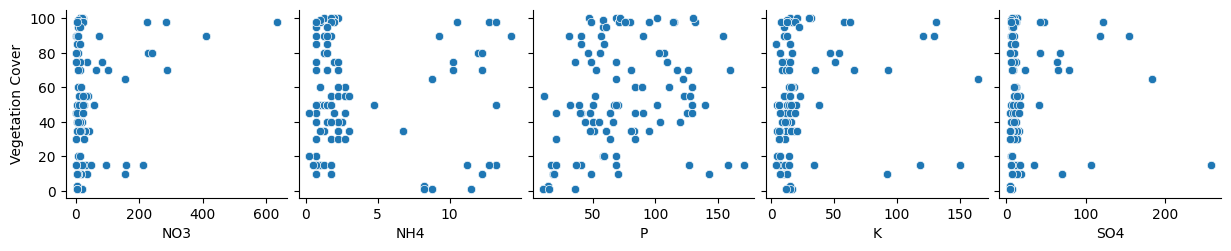

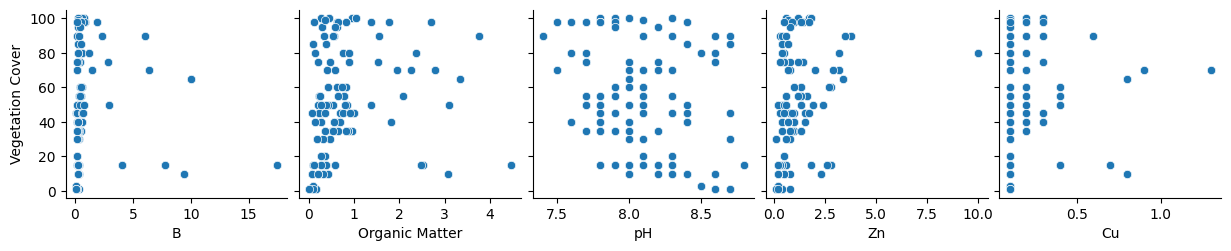

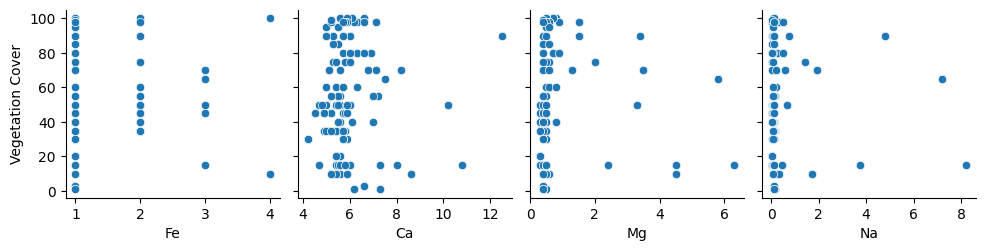

<Axes: >

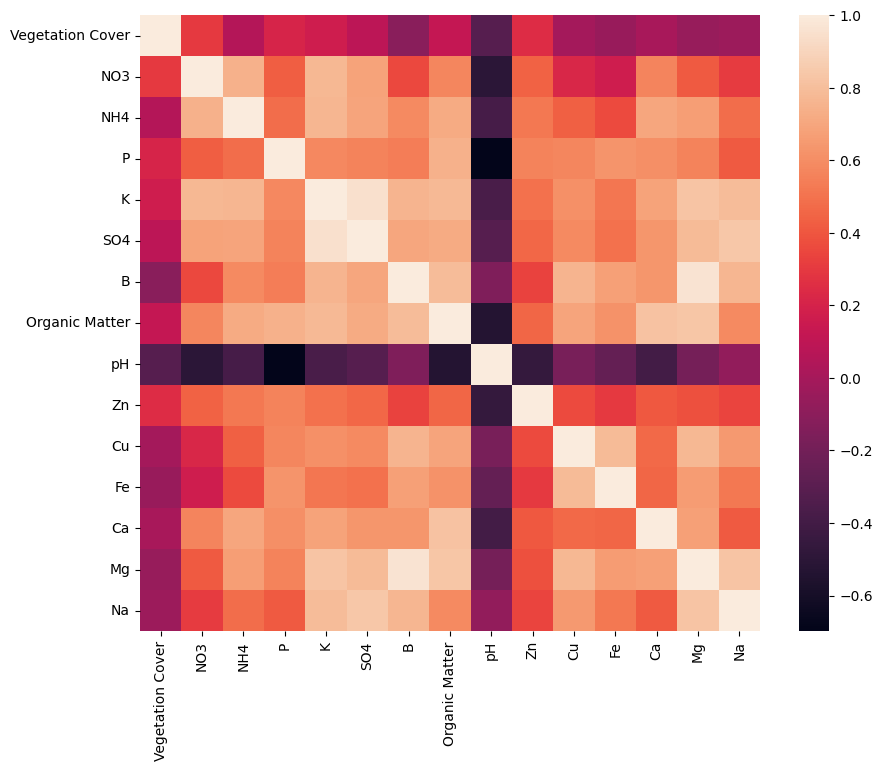

In [12]:
import seaborn as sns

#pair plots
pairplot1 = sns.pairplot(soil_data,x_vars=soil_data.columns[1:6],y_vars=['Vegetation Cover'])
plt.show()

pairplot2 = sns.pairplot(soil_data,x_vars=soil_data.columns[6:11],y_vars=['Vegetation Cover'])
plt.show()

pairplot3 = sns.pairplot(soil_data,x_vars=soil_data.columns[11:15],y_vars=['Vegetation Cover'])
plt.show()

# getting coeralation values
values = soil_data.corr()
# plotting values
plt.figure(figsize=(10,8))
sns.heatmap(values,annot=False)

<h1>Visualizing result of corelation matrix</h1>

It is clear from above matrix that Vegetation Cover is highly depends on pH.

 <h1>Reading processed data</h1>

In [13]:
import pandas as pd
import numpy as np


X, Y = soil_data[soil_data.columns[1:]], soil_data['Vegetation Cover']


print(X[:10])
print(X)
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X, Y = scaler.fit_transform(X.values), scaler.fit_transform(Y.values.reshape(-1,1))
print(X[0])

     NO3   NH4      P     K   SO4     B  Organic Matter   pH   Zn   Cu   Fe  \
0  23.00  2.25  101.0  32.0  12.0  0.71            0.96  7.8  1.7  0.3  4.0   
1   6.00  0.75   58.0  10.0   7.0  0.27            0.30  8.2  0.8  0.1  1.0   
2   7.25  1.00  115.0   8.0  10.0  0.56            0.62  7.9  1.4  0.2  2.0   
3  21.00  1.25  130.0  30.0  13.0  0.78            1.04  7.9  1.8  0.3  2.0   
4   1.75  0.50   17.0   4.0   6.0  0.25            0.10  8.8  0.3  0.1  1.0   
5   2.00  0.75   40.0   8.0   6.0  0.24            0.22  8.3  0.9  0.1  1.0   
6   1.50  0.25   21.0  12.0   5.0  0.20            0.08  8.7  0.3  0.1  1.0   
7  14.75  0.75   53.0  12.0   8.0  0.18            0.41  8.3  0.8  0.1  1.0   
8  12.75  2.00   72.0  15.0  10.0  0.64            0.45  8.0  1.2  0.2  2.0   
9  18.50  1.75   47.0  21.0   7.0  0.29            0.28  8.3  0.6  0.1  1.0   

    Ca   Mg    Na  
0  6.6  0.8  0.12  
1  5.0  0.5  0.07  
2  5.2  0.4  0.04  
3  6.1  0.7  0.10  
4  4.7  0.5  0.10  
5  4.9  0.

<h1>Implementing ML models</h1>

<h3>Useful functions to implement a general model</h3>

In [14]:
from sklearn.metrics import r2_score

def train(model, X, Y):
    model.fit(X,Y)
    return model

def print_metrics(model, X, Y):
    
    # predicted test data
    y_pred = model.predict(X)
    
    # Mean square Error
    mean_square_error = np.sum((y_pred-Y)**2)/len(y_pred)
    print('Mean Square Error : ', mean_square_error)
    
    # Root Mean Square Error
    print('Root Mean Square Error : ', mean_square_error**0.5)
    
    # Mean absolute Error
    print('Mean Absolute Error : ', np.abs(Y - y_pred).sum()/len(y_pred))
    
    # R2 Score
    print('R2 Score : ', r2_score(Y, y_pred))

    print('Accuracy : ',model.score(X,Y))
    

<h3>Spliting data into train and test set</h3>

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.10, random_state=43)
print(X_train)

[[0.04143646 0.17857143 0.33540373 ... 0.18072289 0.01666667 0.002442  ]
 [0.24309392 0.60714286 0.69565217 ... 0.39759036 0.91666667 0.87545788]
 [0.37963694 0.85714286 0.57763975 ... 0.3253012  0.1        0.05494505]
 ...
 [0.04459353 0.46428571 0.52795031 ... 0.18072289 0.03333333 0.01098901]
 [0.02209945 0.         0.30434783 ... 0.14457831 0.         0.001221  ]
 [0.06156275 0.10714286 0.26086957 ... 0.15662651 0.03333333 0.00610501]]


<h2>Implement Linear Model</h2>


In [16]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

# training
linearModel = train(linearModel,X_train,Y_train)

#print metrics
print_metrics(linearModel, X_test, Y_test)


with open('Linear Model','wb') as f:
  pickle.dump(linearModel,f)

Mean Square Error :  0.07408422339697686
Root Mean Square Error :  0.27218417183403015
Mean Absolute Error :  0.24048485075694293
R2 Score :  0.12946778762096312
Accuracy :  0.12946778762096312
